# Pandas 를 이용한 Data Processing
## 주가 분석

In [ ]:
!pip install pandas_datareader

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data_reader
plt.rcParams['figure.figsize'] = (12, 8)

## 삼성전자 주식 가격

In [23]:
df = data_reader.DataReader("005930.KS", data_source="yahoo", start='2021-01-01')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,84400.0,80200.0,81000.0,83000.0,38655276.0,81879.335938
2021-01-05,83900.0,81600.0,81600.0,83900.0,35335669.0,82767.187500
2021-01-06,84500.0,82100.0,83300.0,82200.0,42089013.0,81090.140625
2021-01-07,84200.0,82700.0,82800.0,82900.0,32644642.0,81780.695312
2021-01-08,90000.0,83000.0,83300.0,88800.0,59013307.0,87601.023438


In [24]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-29,73000.0,71400.0,71700.0,72300.0,16682559.0,72300.0
2021-11-30,73900.0,70500.0,73200.0,71300.0,30364841.0,71300.0
2021-12-01,74800.0,71600.0,72000.0,74400.0,21954856.0,74400.0
2021-12-02,75800.0,73800.0,73900.0,75800.0,23652940.0,75800.0
2021-12-03,76000.0,74100.0,75600.0,75600.0,18330240.0,75600.0


- 주가 chart

<AxesSubplot:xlabel='Date'>

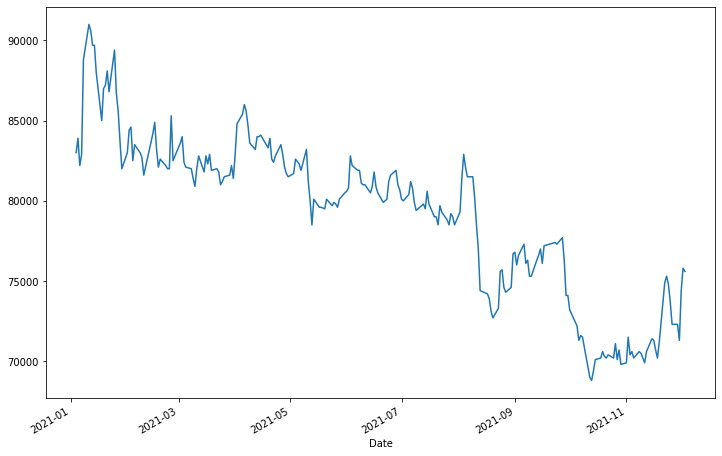

In [31]:
df['Close'].plot()

- 2021.1.1 ~ 이동 평균선 그리기

<AxesSubplot:xlabel='Date'>

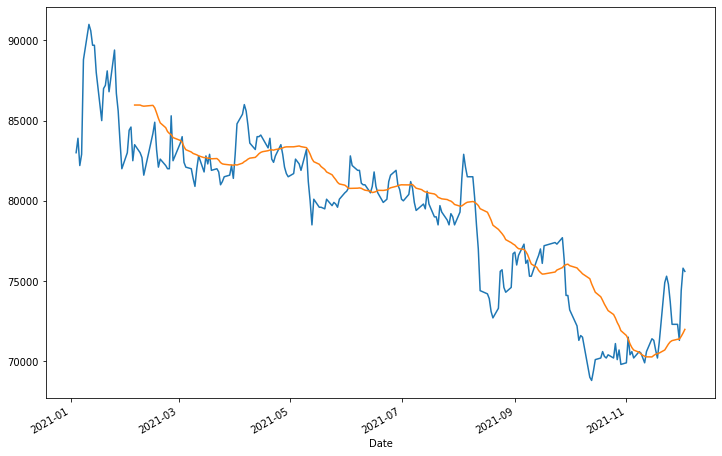

In [32]:
df['Close'].plot()
df['Close'].rolling(25).mean().plot()

- csv file로 저장

In [33]:
df.to_csv("SAMSUNG.csv")

## 일반 함수화

- 국가별로 주식 ticker 처리

In [34]:
def get_stock_price(country, ticker):
    if country == "KR":
        df = data_reader.DataReader(ticker + ".KS", data_source="yahoo")
    elif country == "US":
        df = data_reader.DataReader(ticker, data_source="yahoo")
    return df

In [35]:
df = get_stock_price("US", "TSLA")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-05,37.778000,36.501999,36.501999,37.360001,20361000.0,37.360001
2016-12-06,37.316002,36.535999,37.104000,37.169998,16958000.0,37.169998
2016-12-07,38.680000,37.000000,37.230000,38.630001,27309500.0,38.630001
2016-12-08,38.500000,37.908001,38.410000,38.458000,15970500.0,38.458000
2016-12-09,38.768002,38.161999,38.174000,38.436001,13612500.0,38.436001


In [36]:
df = get_stock_price("KR", "005490") #포항제철
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-06,261000.0,251500.0,252000.0,258500.0,426242.0,212094.718750
2016-12-07,264500.0,260500.0,262000.0,263000.0,606405.0,215786.875000
2016-12-08,279000.0,268000.0,270000.0,279000.0,764667.0,228914.640625
2016-12-09,279000.0,274000.0,278000.0,279000.0,295502.0,228914.640625
2016-12-12,282500.0,274000.0,277000.0,282500.0,400837.0,231786.328125


## 여러 주식 종목의 가격 비교

In [37]:
tesla = get_stock_price("US", "TSLA")
ford = get_stock_price("US", "FORD")
apple = get_stock_price("US", "AAPL")
google = get_stock_price("US", "GOOGL")
sec = get_stock_price("KR", "005930")

### Normalized Price

- 시초가를 1 로 맞추어 놓고 변화된 상대 가격 비교

In [38]:
tesla['normed Close'] = tesla['Close']/tesla['Close'][0]
ford['normed Close'] = ford['Close']/ford['Close'][0]
apple['normed Close'] = apple['Close']/apple['Close'][0]
google['normed Close'] = google['Close']/google['Close'][0]
sec['normed Close'] = sec['Close']/sec['Close'][0]

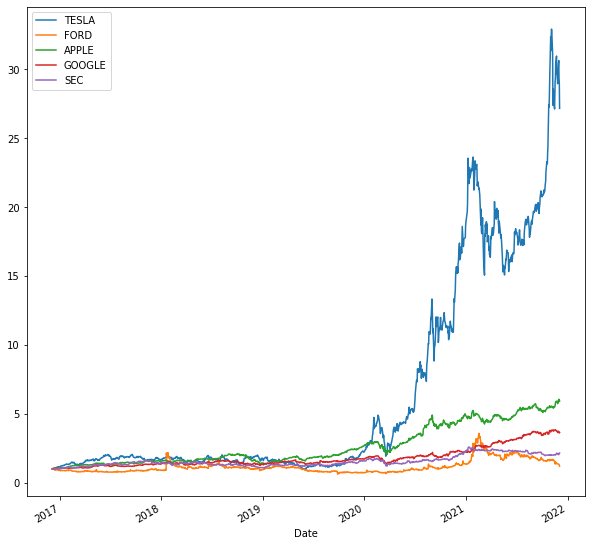

In [39]:
plt.figure(figsize=(10, 10))
tesla['normed Close'].plot(label='TESLA')
ford['normed Close'].plot(label='FORD')
apple['normed Close'].plot(label='APPLE')
google['normed Close'].plot(label='GOOGLE')
sec['normed Close'].plot(label='SEC')
plt.legend()